### Intro

### 좌표 설정 및 그래프 시각화

In [1]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 컬러로 출력하고 싶으면 True로 수정
g_color = False

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [2]:
!git clone -l -s https://github.com/metamath1/noviceml.git noviceml


Cloning into 'noviceml'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 185 (delta 62), reused 74 (delta 24), pack-reused 48
Receiving objects: 100% (185/185), 7.87 MiB | 13.66 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [3]:
D1 = np.array([[1.0,1.2,3,4,5,6],            #x좌표
               [1.5,3,2.3,5.3,3.8,5.5]]) #y좌표

D2 = np.array([[-0.6,1.0,1.2,3,4,5,6],            #x좌표
               [2.9,1.5,3,2.3,5.3,3.8,5.5]]) #y좌표

In [4]:
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

In [5]:
# 데이터를 두벌 마련합니다.
# D1은 앞서 예제로 들었던 최초 점 6개짜리 데이터입니다.
# D2는 D1에 제일 왼쪽점 하나가 더 추가된 데이터입니다.
D1 = np.array([[1.0, 1.2, 3, 4, 5, 6], [1.7, 3, 2.3, 5.3, 3.8, 5.5]])
D2 = np.array([[-0.6, 1.0, 1.2, 3, 4, 5, 6], [2.9, 1.7, 3, 2.3, 5.3, 3.8, 5.5]])


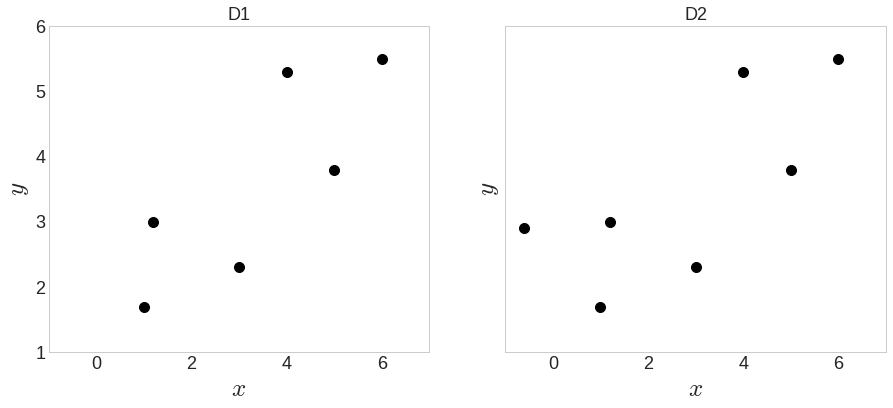

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.set_title('D1', fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.set_title('D2', fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap1/fig1-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-4.pdf", format='pdf', bbox_inches='tight')

plt.show()

### 머신러닝과 more_clever()비교

- 선형회귀 알고리즘 맛보기

In [7]:
def machine_learning(D):
    """
    선형회귀 알고리즘을 사용하여 최적의 직선을 계산합니다.
    D : (2,N)의 어레이로 1행에는 데이터의 x좌표
        2행에는 데이터의 y좌표가 저장 되어 있습니다.
    """
    # 데이터의 개수를 N에 할당합니다.
    N = D.shape[1] 
    
    # 1열에 1, 2열에 데이터의 x좌표를 가지는 행렬을 만듭니다.
    # X: (N,2), y: (N,)
    X = np.c_[np.ones(N), D[0]]
    y = D[1]
    
    # 앞으로 배울 정규방정식을 풀어서 직선의 계수를 구합니다.
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

def more_clever(D):
    """
    첫점과 끝점을 연결하는 직선을 계산합니다.
    D : (2,N)의 어레이로 1행에는 데이터의 x좌표
        2행에는 데이터의 y좌표가 저장 되어 있습니다.
    """
    first, last = D[:,0], D[:,-1]
    
    w1 = (last[1]-first[1]) / (last[0]-first[0])
    w0 = -w1*first[0] + first[1]
    
    return (w0, w1)
    
def f(x, w):
    """
    주어진 w를 사용하여 직선 f(x) = w[1]*x + w[0]의 값을 계산합니다.
    """
    return w[1]*x + w[0]

In [8]:
# D1에 대해서 w[1]*x + w[0]에서 w[0], w[1]을 구합니다. 
w_ml_d1 = machine_learning(D1)
w_mc_d1 = more_clever(D1)

# D2에 대해서 w[1]*x + w[0]에서 w[0], w[1]을 구합니다. 
w_ml_d2 = machine_learning(D2)
w_mc_d2 = more_clever(D2)

print(w_ml_d1)

[1.5108 0.6206]


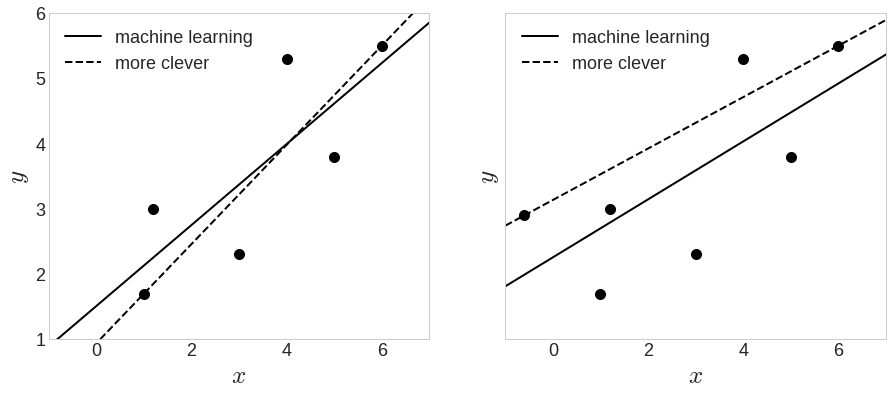

In [9]:
x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.plot(x, f(x, w_ml_d1), c='k', lw=2, label='machine learning')
ax1.plot(x, f(x, w_mc_d1), '--', c='k', lw=2, label='more clever')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.plot(x, f(x, w_ml_d2), c='k', lw=2, label='machine learning')
ax2.plot(x, f(x, w_mc_d2), '--', c='k', lw=2, label='more clever')
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.legend(fontsize=18)

# 그림이 저장될 로컬 폴더를 적당히 설정후 실행하세요.
if file_print == True :
    fig.savefig("imgs/chap1/fig1-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-5.pdf", format='pdf', bbox_inches='tight')

plt.show()

그래프 해석

데이터의 갯수가 작았을 때는 간단하게 직선의 방정식으로 구현하는 것이 좋을지 몰라도 데이터에 대한 강인함과 범용성은 머신러닝이 뛰어난 것으로 보인다.

### 최적의 직선은 뭘까?


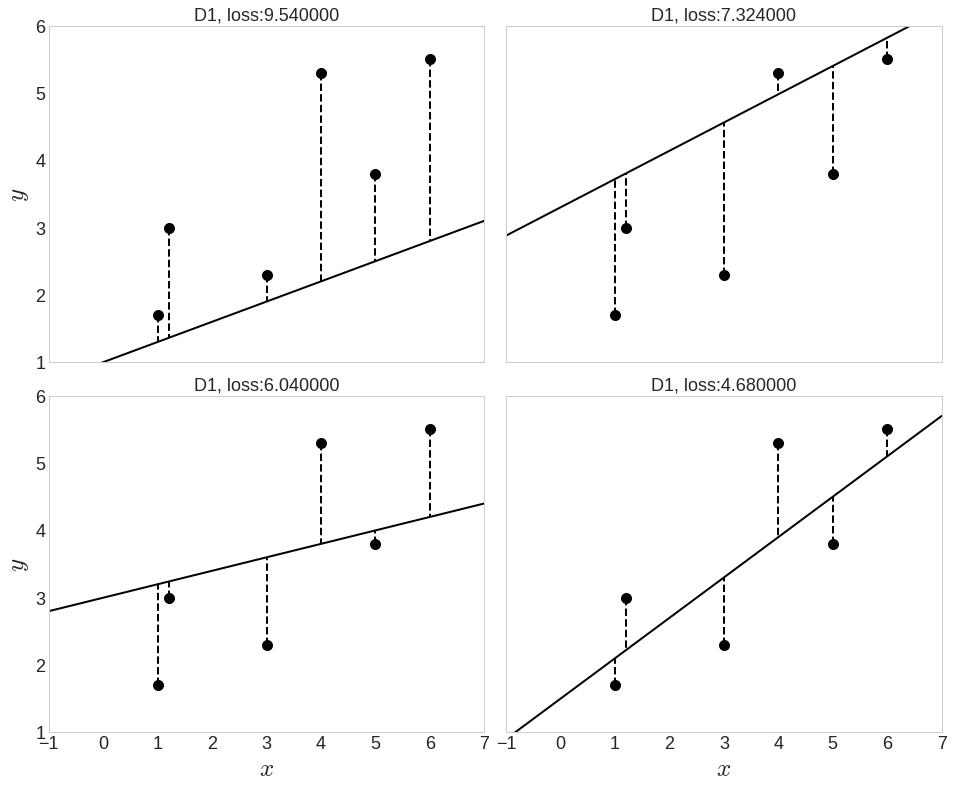

In [10]:
W = np.array([[1.0, 0.3],[3.3, 0.42],[3.0, 0.2],[1.5, 0.6]])

fig, ax = plt.subplots(2, 2, sharex='all', sharey='all')
fig.set_size_inches((16,13))

for j in range(W.shape[0]):
    w0, w1 = W[j,0], W[j,1]
    y=f(D1[0], [w0, w1])
    loss = 0.0
    
    ax[j // 2, j % 2].xaxis.set_tick_params(labelsize=18)
    ax[j // 2, j % 2].yaxis.set_tick_params(labelsize=18)
    ax[j // 2, j % 2].set_xlabel('$x$', fontsize=25)
    ax[j // 2, j % 2].set_ylabel('$y$', fontsize=25)
    ax[j // 2, j % 2].plot(x, f(x, [w0,w1]), c='k', lw=2, label='machine learning')
    ax[j // 2, j % 2].grid(False)
    
    for i in range(len(y)):
        loss+=np.abs(D1[1,i]-y[i])
        ax[j // 2, j % 2].plot([D1[0,i], D1[0,i]],[D1[1,i], y[i]],'k--')
        
    ax[j // 2, j % 2].plot(D1[0], D1[1], 'ko', markersize=10)
    ax[j // 2, j % 2].set_xlim([-1,7])
    ax[j // 2, j % 2].set_ylim([1,6])
    ax[j // 2, j % 2].set_title('D1, loss:{:f}'.format(loss), fontsize=18)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in ax.flat:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.1, wspace=0.05)

# 그림이 저장될 로컬 폴더를 적당히 설정후 실행하세요.
if file_print == True :
    fig.savefig("imgs/chap1/fig1-7.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-7.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

#### 점과 직선 사이의 수직 거리

- loss : 점과 선의 수직 거리 총합

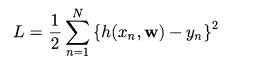

#### 경사도 벡터

- 정의된 손실을 지우려면 위의 첫번째 그림 같이 선의 위치와 기울기를 바꿔봐야 한다.

- 항상 손실이 작아지도록 바꿔주는 안전장치를 경사도 벡터라고 한다.

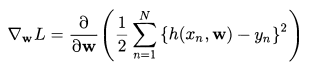

#### 코드로 보는 선형회귀2

- 머신러닝 학습: 업데이트 식을 활용하여 직관적으로 선을 수정하는 것과 같은 작업

- 학습을 통해 얻은 결과를 업데이트하여 사용한다.


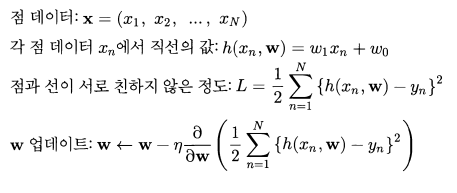

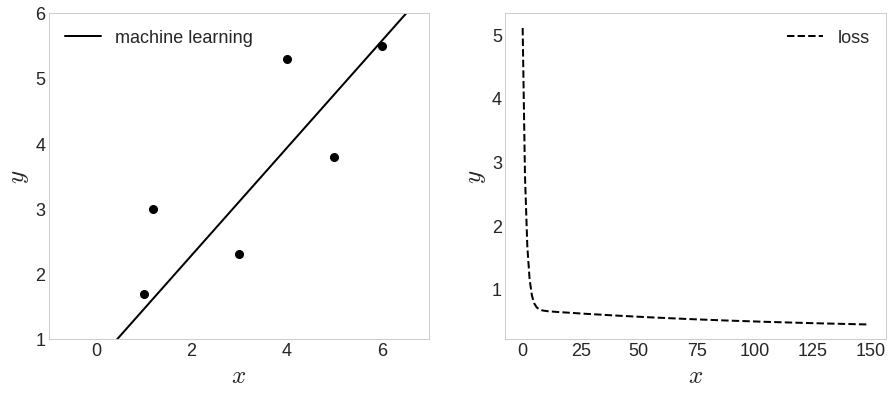

In [11]:
#최적의 선을 구하는 과정
num_iters = 150
alpha = 0.02

np.random.seed(2)
w = np.random.randn(2)
N = D1.shape[1]

ws, L = [] , []


# 1열에 1, 2열에 데이터의 x좌표를 가지는 행렬을 만듭니다.
# X: (N,2), y: (N,)
X = np.c_[np.ones(N), D1[0]]
y = D1[1]

#우리의 경험 E를 반복하면서 테스크 T를 개선

for i in range(num_iters):
    #grad L
    c = (1/N) * np.dot(X.T, np.dot(X,w) -y)
    #안정자치 grad L을 이용해서 w를 수정한다
    w -= alpha*c
    #w가 변화되는 과정을 저장
    ws.append(w)

    #손실 계산
    L.append(((np.dot(X,w) -y)**2).sum()/(2*N))


x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)
    
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)
    
ax1.plot(D1[0], D1[1], 'ko', markersize=8)
ax1.plot(x, f(x, w), c='k', lw=2, label='machine learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(L[:150], '--', c='k', label='loss')
ax2.legend(fontsize=18)

# 그림이 저장될 로컬 폴더를 적당히 설정후 실행하세요.
if file_print == True :
    fig.savefig("imgs/chap1/fig1-8.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-8.pdf", format='pdf', bbox_inches='tight')
    
plt.show()


그래프 해석

위의 머신러닝 함수와 비교했을 때, 아쉬운 부분이 보입니다. 이러한 이유는 학습이 충분하게 되지 않았습니다. 그러므로 학습을 늘리면 유사하게 될 것입니다.

학습이 진행될수록 LOSS값이 줄어드니 의도한대로 잘 되고 있습니다.

## 머신 러닝의 분류

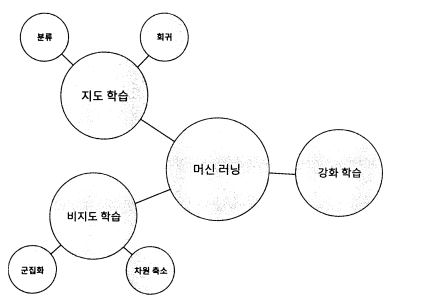

#### 지도학습

- 입력과 출력이 있을 때, 관계를 찾아내는 과정이다

- 성공적인 수행을 위해서는 입력과 출력이 많이 있어야한다.

- 예:

   - 분류: 스팸 메일 필터링, 이미지 분류

   - 회귀: 주택가격예측, 물건의 판매량과 대여량 예측


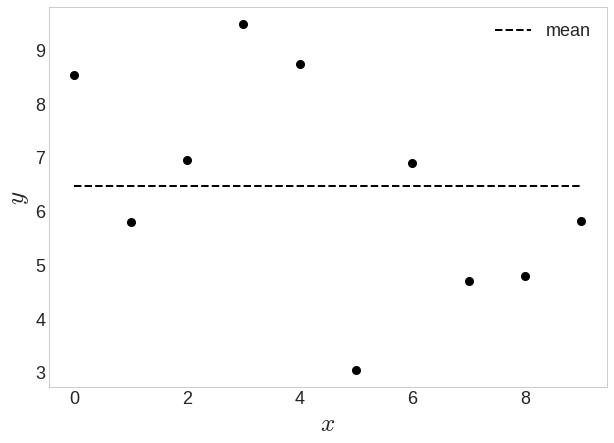

In [12]:
#지도학습
#위에서 했던 선 긋기
#회귀
np.random.seed(0)
P = np.random.normal(loc=5.0, scale=2.0, size=10)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

plt.plot(P, 'ko', markersize=8)
plt.plot(np.arange(10), [P.mean()]*10, 'k--', label='mean')
plt.legend(fontsize=18)

# 그림이 저장될 로컬 폴더를 적당히 설정후 실행하세요.
if file_print == True :
    fig.savefig("imgs/chap1/fig1-11.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-11.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

주어진 점 데이터 사이에 존재하는 입력-출력 관 
계를 찾아내는 것이므로 지도 학습이라 할 수 있습니다. 

선을 주어진 점에 맞춘다는 의미로 이런 선 찾기 작업을 보간interpolation 또는 근사approximation 라고 합니다. 


모든 점을 다 지나가는 선을 찾는다면 복간이라 하고 우리가 한 것처 럼 점 근방을. 지나가는 선을 찾는다면근사라고 합니다. 

보간은 점과 점 사이에 있는 빈 공간을 채운다는 의미입니다. 

머신 러닝에서는 이 과정을 통계학적인 관점으로 바라보는 
데 데이터들이 특정 평균을 가지는 분포로부터 발생했다고 보는 것입니다. 

#### 비지도학습

- 입력과 출력이 쌍으로 주어지지 않고 입력만을 사용해서 의미있는 결론을 이끌어 내어야한다.

- 예: 

   - 군집화: 입력데이터가 가진 특성으로부터 유사도를 계산한 후 이를 기반으로 데이터끼리 그룹화하는 방법으로 k-평균 군집화 알고리즘이 대표적인 예이다.

   - 차원 축소

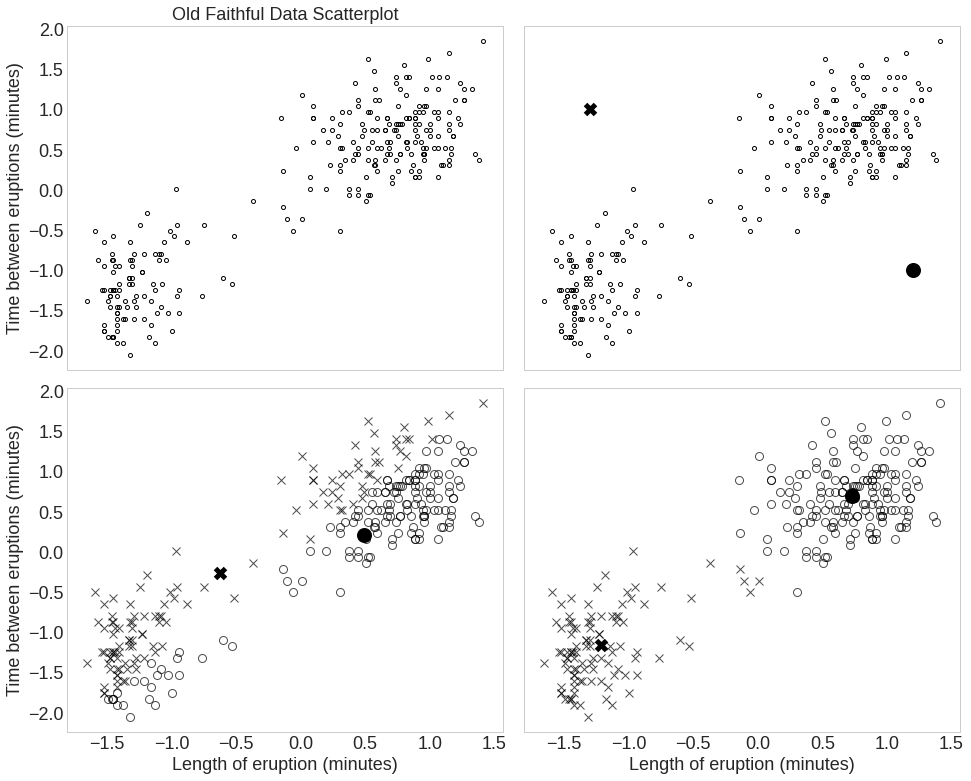

In [13]:
import pandas as pd

faithful = pd.read_csv('/content/noviceml/faithful.csv')
faithful.head()

faithful = (faithful - faithful.mean()) / faithful.std()
faithful.columns = ['eruptions', 'waiting']

# fig, ax = plt.subplots(2, 2)
# fig.set_size_inches(15,10)

fig, ax = plt.subplots(2, 2, sharex='all', sharey='all')
fig.set_size_inches((16,13))

ax[0,0].plot(faithful.eruptions, faithful.waiting, 'k.',  fillstyle='none', markersize=8)
ax[0,0].set_title('Old Faithful Data Scatterplot', fontsize=18)
ax[0,0].xaxis.set_tick_params(labelsize=18)
ax[0,0].yaxis.set_tick_params(labelsize=18)
ax[0,0].set_xlabel('Length of eruption (minutes)', fontsize=18)
ax[0,0].set_ylabel('Time between eruptions (minutes)', fontsize=18)
ax[0,0].grid(False)

centroids = np.array([[-1.3, 1.0], [1.2, -1.0]])
ax[0,1].plot(faithful.eruptions, faithful.waiting, 'k.', fillstyle='none', markersize=8)
ax[0,1].plot(centroids[0,0], centroids[0,1], 'kx', markersize=10, markeredgewidth=5)
ax[0,1].plot(centroids[1,0], centroids[1,1], 'ko', markersize=10, markeredgewidth=5)
ax[0,1].xaxis.set_tick_params(labelsize=18)
ax[0,1].yaxis.set_tick_params(labelsize=18)
ax[0,1].set_xlabel('Length of eruption (minutes)', fontsize=18)
ax[0,1].set_ylabel('Time between eruptions (minutes)', fontsize=18)
ax[0,1].grid(False)

faith = np.array(faithful)
k = 2

# 클러스터링 과정을 5회 반복한다.
for i in range(2):
    # faith에 저장된 272개의 점에 대해 각각 점이 클러스터 0인지 클러스터 1인지를 기록하는 2차원 어레이
    # 아래처럼 272행 k(클러스터 수)열인 2차원 어레이
    #
    # rnk 어레이는 다음처럼 행번호에 해당하는 점이 열번호에 해당하는 묶음에 할당되면 1, 아니면 0으로 표시한다.
    #
    # rnk = [ [1, 0],      첫번째 점은 0번 묶음이다.
    #         [0, 1],      두번째 점은 1번 묶음이다.
    #         ...   ,
    #         ...   ,
    #         [1, 0] ]     272번째 점은 0번 묶음이다.
    #
    # 처음에는 모두 0으로 초기화
    rnk_row = faith.shape[0]
    rnk_col = k
    rnk = np.zeros( (rnk_row, rnk_col) )
    
    # 1) 모든 데이터에 대해서 초기 중심점과의 간격을 계산하여 더 가까운쪽의 묶음으로 데이터를 할당한다.
    # 각점이 어느 클러스터에 속하는지 rnk 어레이에 표시한다.
    for n in range(faith.shape[0]):
        # 각 데이터 포인트를 x에 받아와서
        x = faith[n]
        
        # 현재 중심점 2개 centroids[0]와 centroids[1]간의 거리를 구해서 비교한다.
        # 초기 중심점은 다음처럼 윗셀에서 초기화 했다.
        # centroids = np.array([[-1.3, 1.0], [1.2, -1.0]])
        # 각 중심점에서 x까지 거리를 구하는 법 : np.linalg.norm(x-centroids[0]), np.linalg.norm(x-centroids[1])
        dist_0 = np.linalg.norm(x-centroids[0])
        dist_1 = np.linalg.norm(x-centroids[1]) 
        if dist_0 < dist_1 :
            rnk[n,0] = 1
        else :
            rnk[n,1] = 1
    
    # 그림을 그리기위해 faith에 저장된 점데이터를 파랑과 빨강으로 분류 한다.
    # 앞서 만든 rnk 어레이의 상태에 따라 두 부분으로 나눈다.
    blue = faith[np.where(rnk[:,0]==1)]
    red  = faith[np.where(rnk[:,1]==1)]
    
    ##########################################################################################
    # 2) 위 작업이 완료되면 두 묶음으로 분리된 데이터의 평균점을 구한다.
    # 힌트 : 지금 두 묶음은 위의 blue, red 어레이에 각각 들어가 있고
    # blue 어레이에 저장된 점의 평균을 centroids[0]에 할당하고
    # red 어레이에 저장된 점의 평균을 centroids[1]에 할당한다.
    # 어레이의 평균을 구하기 위해서는 mean 함수를 사용한다.
    # mean함수 문서 : https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html
    centroids[0] = blue.mean(axis=0)
    centroids[1] = red.mean(axis=0)
    
    # 한번 반복 후 클러스터링 상황을 그린다.
    ax[1,i].plot(blue[:,0], blue[:,1],'kx', fillstyle='none', markersize=8, alpha=0.7)
    ax[1,i].plot(red[:,0],  red[:,1], 'ko', fillstyle='none', markersize=8, alpha=0.7) 
    ax[1,i].plot(centroids[0,0], centroids[0,1], 'kx', markersize=10, markeredgewidth=5)
    ax[1,i].plot(centroids[1,0], centroids[1,1], 'ko', markersize=10, markeredgewidth=5)   
    
    ax[1,i].xaxis.set_tick_params(labelsize=18)
    ax[1,i].yaxis.set_tick_params(labelsize=18)
    ax[1,i].set_xlabel('Length of eruption (minutes)', fontsize=18)
    ax[1,i].set_ylabel('Time between eruptions (minutes)', fontsize=18)
    ax[1,i].grid(False)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in ax.flat:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.05, wspace=0.05)

# 그림이 저장될 로컬 폴더를 적당히 설정후 실행하세요.
if file_print == True :
    fig.savefig("imgs/chap1/fig1-10.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-10.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

평균 군집화 알고리즘이 평면에 홑뿌려진 점들을 두 그룹으로 묶는 단계를 보여줍 
니다. *와 •는 두 그룹으로부터 계산한 평균점을 나타냅니다. 이 알고리즘에서도 
평균을점점 개선해 나가는머신 러닝의 전형적인특징을확인할수 있습니다. 

### 선형회귀와 k-최근접 이웃

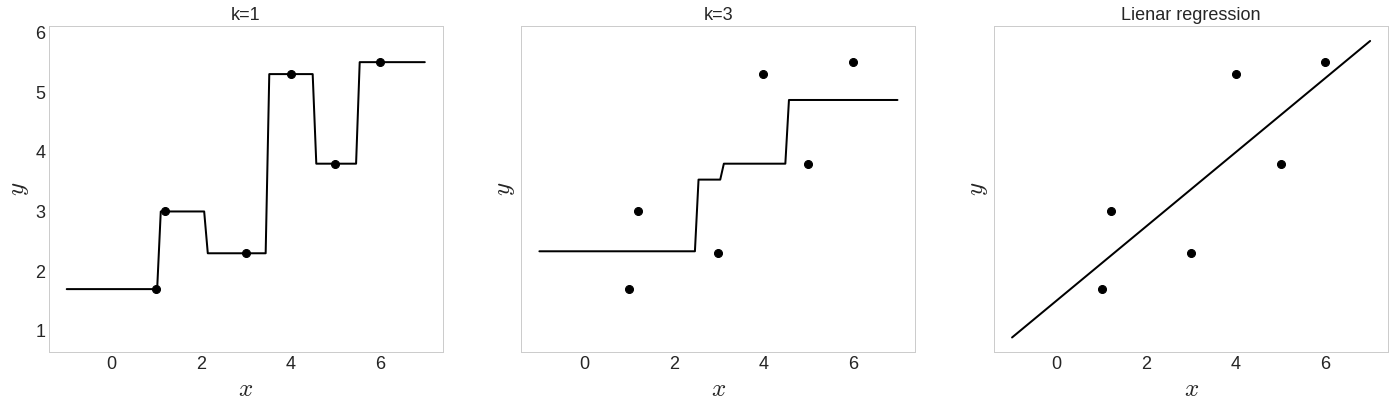

In [14]:
def dist(x1, x2):
    return np.abs(x1-x2)

def knn_point(D, p, k=3):
    return sorted(D, key=lambda e: dist(e[0], p) )[:k]

fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(24,6)

x = np.linspace(-1, 7, 100)

# knn
for i, k in enumerate([1, 3]):
    y_pred = []
    for p in x :
        ps = knn_point(D1.T, p, k)
        y_pred.append(np.asarray(ps)[:,1].mean())

    ax[i].plot(D1[0], D1[1], 'ko', markersize=8)    
    ax[i].plot(x, y_pred, c='k')
    ax[i].set_title("k={}".format(k), fontsize=18)
    ax[i].xaxis.set_tick_params(labelsize=18)
    ax[i].yaxis.set_tick_params(labelsize=18)
    ax[i].set_xlabel('$x$', fontsize=25)
    ax[i].set_ylabel('$y$', fontsize=25)
    ax[i].grid(False)
    
    
# linear regression
w_ml_d1 = machine_learning(D1)
ax[2].plot(D1[0], D1[1], 'ko', markersize=8) 
ax[2].plot(x, f(x, w_ml_d1), c='k', lw=2, label='machine learning')
ax[2].set_title('Lienar regression', fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=18)
ax[2].yaxis.set_tick_params(labelsize=18)
ax[2].set_xlabel('$x$', fontsize=25)
ax[2].set_ylabel('$y$', fontsize=25)
ax[2].grid(False)

# 그림이 저장될 로컬 폴더를 적당히 설정후 실행하세요.
if file_print == True :
    fig.savefig("imgs/chap1/fig1-12.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-12.pdf", format='pdf', bbox_inches='tight')

plt.show()
